<a href="https://colab.research.google.com/github/RafsanJany-44/ARC/blob/master/The_MEGH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Function

In [2]:
!pip install imbalanced-learn

from imblearn.over_sampling import SMOTE

def balance(X_temp, y_temp):
  smote = SMOTE()
  X_temp, y_temp= smote.fit_resample(X_temp, y_temp)
  return pd.concat([pd.DataFrame(X_temp), pd.DataFrame(y_temp)], axis=1)



def models_check_box(models):
  import ipywidgets as widgets
  from IPython.display import display
  new_keys=[]
  for i in models:
    i=widgets.Checkbox(
      value=False,
      description=str(i),
      disabled=False,
      indent=False
      )
    display(i)
    new_keys.append(i)
  return new_keys

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Starting

In [8]:
import numpy as np
import pandas as pd
#dataset=pd.read_csv("/content/drive/MyDrive/Sleep Stage XAI/EEG_HMC_FeatureExtraction_2023.01.19.csv")
#dataset=pd.read_excel("/content/EEG_CNU_Control_Resting, walking, working and Reading_2023.01.07.xlsx")

dataset = pd.read_excel("/content/drive/MyDrive/Iqram Sir/history/EEG_CNU_Control_Resting, walking, working and Reading_2023.01.07.xlsx")

target = "Activity"
result = {}

In [9]:
dataset.head()

Activity   Status  Epoch  RP_Alpha_F  RP_Beta_F  RP_Theta_F  RP_Delta_F  \
0  Resting  Control      0    0.101451   0.226173    0.109949    0.490260   
1  Resting  Control      1    0.089052   0.205169    0.079099    0.555265   
2  Resting  Control      2    0.126664   0.352278    0.098481    0.305308   
3  Resting  Control      3    0.143779   0.249933    0.134372    0.386993   
4  Resting  Control      4    0.190840   0.266358    0.204198    0.280807   

   RP_Gamma_F  RP_Alpha_O  RP_Beta_O  ...  pdBSI_gamma_T   pdBSI_T        DAR  \
0    0.072166    0.035895   0.020750  ...       0.459030  0.214583  12.438393   
1    0.071416    0.061148   0.064307  ...       0.330678  0.153688   8.122782   
2    0.117269    0.058428   0.053895  ...       0.401001  0.197538   7.248717   
3    0.084923    0.065183   0.040459  ...       0.395906  0.157050   8.925147   
4    0.057797    0.029943   0.016349  ...       0.430493  0.155118  13.888878   

        DTR     DTABR  RP_Alpha_G  RP_Beta_G  RP_Theta_G  RP_Delta_G  \
0  5.539580  5.283557       0.358      0.640       0.750        4.03   
1  5.075034  3.541553       0.458      0.806       0.724        3.76   
2  4.694718  2.869184       0.501      1.060       0.737        3.32   
3  4.484127  4.446999       0.498      0.711       0.908        3.65   
4  5.672066  6.891941       0.430      0.569       0.849        4.00   

   RP_Gamma_G  
0       0.221  
1       0.253  
2       0.382  
3       0.230  
4       0.150  

[5 rows x 43 columns]

In [10]:
dataset.shape

(1711, 43)

In [11]:
dataset[target].value_counts()

Reading    793
Walking    408
Working    267
Resting    243
Name: Activity, dtype: int64

In [12]:
set(list(dataset[target]))

{'Reading', 'Resting', 'Walking', 'Working'}

In [13]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
dataset[target]=encoder.fit_transform(dataset[target])

In [15]:
set(list(dataset[target]))

{0, 1, 2, 3}

###Spliting into X and y

In [18]:
X =  dataset.loc[:,dataset.columns != target]  # removing Sleep Stage
X =  X.loc[:,X.columns != "Status"]            # removing Status
X =  X.loc[:,X.columns != "Epoch"]             # removing Epoch
y = dataset[target]

X.head(10)


RP_Alpha_F  RP_Beta_F  RP_Theta_F  RP_Delta_F  RP_Gamma_F  RP_Alpha_O  \
0    0.101451   0.226173    0.109949    0.490260    0.072166    0.035895   
1    0.089052   0.205169    0.079099    0.555265    0.071416    0.061148   
2    0.126664   0.352278    0.098481    0.305308    0.117269    0.058428   
3    0.143779   0.249933    0.134372    0.386993    0.084923    0.065183   
4    0.190840   0.266358    0.204198    0.280807    0.057797    0.029943   
5    0.168103   0.226293    0.152802    0.403017    0.049784    0.042168   
6    0.145588   0.217267    0.152278    0.430073    0.054795    0.067864   
7    0.113035   0.170606    0.137140    0.535923    0.043295    0.063531   
8    0.171200   0.247352    0.180361    0.343544    0.057544    0.043591   
9    0.191509   0.275881    0.194188    0.281237    0.057185    0.063870   

   RP_Beta_O  RP_Theta_O  RP_Delta_O  RP_Gamma_O  ...  pdBSI_gamma_T  \
0   0.020750    0.143885    0.795153    0.004317  ...       0.459030   
1   0.064307    0.152405    0.706267    0.015872  ...       0.330678   
2   0.053895    0.150437    0.721961    0.015279  ...       0.401001   
3   0.040459    0.198326    0.687531    0.008502  ...       0.395906   
4   0.016349    0.133276    0.817429    0.003003  ...       0.430493   
5   0.034477    0.129951    0.782358    0.011046  ...       0.380013   
6   0.057781    0.127196    0.736805    0.010354  ...       0.221696   
7   0.066093    0.139359    0.717287    0.013731  ...       0.348357   
8   0.030324    0.162614    0.758107    0.005364  ...       0.402960   
9   0.050650    0.206033    0.669608    0.009838  ...       0.386707   

    pdBSI_T        DAR       DTR     DTABR  RP_Alpha_G  RP_Beta_G  RP_Theta_G  \
0  0.214583  12.438393  5.539580  5.283557       0.358      0.640       0.750   
1  0.153688   8.122782  5.075034  3.541553       0.458      0.806       0.724   
2  0.197538   7.248717  4.694718  2.869184       0.501      1.060       0.737   
3  0.157050   8.925147  4.484127  4.446999       0.498      0.711       0.908   
4  0.155118  13.888878  5.672066  6.891941       0.430      0.569       0.849   
5  0.158437   9.159433  4.909690  4.405570       0.494      0.687       0.812   
6  0.052372   8.562337  5.475070  4.491270       0.527      0.669       0.770   
7  0.114897   8.628646  5.287281  3.925721       0.476      0.719       0.765   
8  0.150786  10.083337  4.565816  5.384672       0.482      0.621       0.934   
9  0.161905   5.262178  2.699725  3.125619       0.660      0.855       1.190   

   RP_Delta_G  RP_Gamma_G  
0        4.03       0.221  
1        3.76       0.253  
2        3.32       0.382  
3        3.65       0.230  
4        4.00       0.150  
5        3.79       0.221  
6        3.85       0.180  
7        3.83       0.207  
8        3.80       0.164  
9        3.08       0.216  

[10 rows x 40 columns]

###USing SMOTE for balancing

In [19]:
new_dataset =  balance(X,y)

In [20]:
new_dataset[target].value_counts()

1    793
2    793
0    793
3    793
Name: Activity, dtype: int64

#Feature Selection

In [ ]:
number_of_feat = 30

###ANOVA with f classifciation

In [ ]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import pandas as pd



fs = SelectKBest(score_func=f_classif, k=5)
fit = fs.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)

featureScores.columns = ['Best_columns','Score_ANOVA'] 

lyst = featureScores.nlargest(number_of_feat,'Score_ANOVA')

#lyst.to_csv('Filter_Method_ANOVA_with_f_classif.csv')

list_of_feat = list(lyst["Best_columns"])

###Embedded Method

In [ ]:
''''
from sklearn.linear_model import LassoCV
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = coef.sort_values()

list_of_feat=[]


for i in range(coef.shape[0]):
  if coef[i]!=0:
    list_of_feat.append(dataset.iloc[:0,i+3].name)
    
df = pd.DataFrame(list_of_feat, columns=['Best_Features'])

#df.to_csv("Embedded_Method.csv")

list_of_feat = list(df["Best_Features"])
if number_of_feat < len(list_of_feat):
  list_of_feat = list_of_feat[:number_of_feat]
'''

'\'\nfrom sklearn.linear_model import LassoCV\nreg = LassoCV()\nreg.fit(X, y)\nprint("Best alpha using built-in LassoCV: %f" % reg.alpha_)\nprint("Best score using built-in LassoCV: %f" %reg.score(X,y))\ncoef = pd.Series(reg.coef_, index = X.columns)\n\nprint("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")\n\nimp_coef = coef.sort_values()\n\nlist_of_feat=[]\n\n\nfor i in range(coef.shape[0]):\n  if coef[i]!=0:\n    list_of_feat.append(dataset.iloc[:0,i+3].name)\n    \ndf = pd.DataFrame(list_of_feat, columns=[\'Best_Features\'])\n\n#df.to_csv("Embedded_Method.csv")\n\nlist_of_feat = list(df["Best_Features"])\nif number_of_feat < len(list_of_feat):\n  list_of_feat = list_of_feat[:number_of_feat]\n'

###Pearson's with f regression

In [ ]:
'''
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import pandas as pd


fs = SelectKBest(score_func=f_regression, k=5)
fit = fs.fit(X,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(dataset.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)

featureScores.columns = ['Best_columns','Score_pearsons'] 


lyst = featureScores.nlargest(number_of_feat,'Score_pearsons')

#lyst.to_csv('Filter_Method_Pearson’s_with_f_regression.csv')

list_of_feat = list(lyst["Best_columns"])
'''

'\nfrom sklearn.datasets import make_regression\nfrom sklearn.feature_selection import SelectKBest\nfrom sklearn.feature_selection import f_regression\nimport pandas as pd\n\n\nfs = SelectKBest(score_func=f_regression, k=5)\nfit = fs.fit(X,y)\n\ndfscores = pd.DataFrame(fit.scores_)\ndfcolumns = pd.DataFrame(dataset.columns)\nfeatureScores = pd.concat([dfcolumns,dfscores],axis=1)\n\nfeatureScores.columns = [\'Best_columns\',\'Score_pearsons\'] \n\n\nlyst = featureScores.nlargest(number_of_feat,\'Score_pearsons\')\n\n#lyst.to_csv(\'Filter_Method_Pearson’s_with_f_regression.csv\')\n\nlist_of_feat = list(lyst["Best_columns"])\n'

###Sequential Feature Selection

In [ ]:
''''
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
sfs = SequentialFeatureSelector(knn, n_features_to_select=number_of_feat)
sfs.fit(X, y)
list_of_feat=[]
list_of_feat=list(sfs.get_feature_names_out(X.columns))

df = pd.DataFrame(list_of_feat, columns=['Best_Features'])

#df.to_csv("Filter_Method_Sequential_feat_Selection_KNN.csv")

list_of_feat = list(df["Best_Features"])
if number_of_feat < len(list_of_feat):
  list_of_feat = list_of_feat[:number_of_feat]
  '''

'\'\nfrom sklearn.feature_selection import SequentialFeatureSelector\nfrom sklearn.neighbors import KNeighborsClassifier\nknn = KNeighborsClassifier(n_neighbors=3)\nsfs = SequentialFeatureSelector(knn, n_features_to_select=number_of_feat)\nsfs.fit(X, y)\nlist_of_feat=[]\nlist_of_feat=list(sfs.get_feature_names_out(X.columns))\n\ndf = pd.DataFrame(list_of_feat, columns=[\'Best_Features\'])\n\n#df.to_csv("Filter_Method_Sequential_feat_Selection_KNN.csv")\n\nlist_of_feat = list(df["Best_Features"])\nif number_of_feat < len(list_of_feat):\n  list_of_feat = list_of_feat[:number_of_feat]\n  '

###All features

In [24]:
list_of_feat = list(X.columns)

###Feature list

In [ ]:
dfcolumns = pd.DataFrame(list_of_feat)
print(dfcolumns)

                0
0      RP_Theta_T
1      RP_Theta_G
2      RP_Gamma_C
3       RP_Beta_F
4       RP_Beta_G
5      RP_Theta_O
6      RP_Theta_C
7       RP_Beta_T
8      RP_Gamma_G
9      RP_Theta_F
10      RP_Beta_C
11     RP_Alpha_F
12  pdBSI_alpha_C
13     RP_Gamma_T
14     RP_Gamma_O
15        pdBSI_C
16  pdBSI_gamma_C
17   pdBSI_beta_C
18      RP_Beta_O
19     RP_Alpha_G
20     RP_Alpha_C
21        pdBSI_T
22  pdBSI_theta_T
23  pdBSI_delta_C
24  pdBSI_theta_C
25     RP_Alpha_T
26   pdBSI_beta_T
27          DTABR
28  pdBSI_alpha_T
29  pdBSI_delta_T


#Data Spliting

In [25]:
X_new = new_dataset[list_of_feat]
y_new = new_dataset[target]

In [26]:
X_new.shape

(3172, 40)

In [27]:
y_new.shape

(3172,)

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.2, random_state = 0)



---



# **Training**



---



#ADABOOST

In [29]:
from sklearn.ensemble import AdaBoostClassifier

ada_defult = AdaBoostClassifier(random_state=0)
ada_defult.fit(X_train, y_train)
y_pred = ada_defult.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(ada_defult,1,'AdaBoostClassifier')]=accuracy_score(y_test, y_pred)


[[ 81  38  24  20]
 [ 37  87  13   8]
 [ 29  23  82  34]
 [ 16  18  24 101]]
              precision    recall  f1-score   support

           0       0.50      0.50      0.50       163
           1       0.52      0.60      0.56       145
           2       0.57      0.49      0.53       168
           3       0.62      0.64      0.63       159

    accuracy                           0.55       635
   macro avg       0.55      0.56      0.55       635
weighted avg       0.55      0.55      0.55       635

Accurecy:  0.552755905511811


1/50 round completed......................... Accurecy: 0.33070866141732286
2/50 round completed......................... Accurecy: 0.3968503937007874
3/50 round completed......................... Accurecy: 0.3826771653543307
4/50 round completed......................... Accurecy: 0.45354330708661417
5/50 round completed......................... Accurecy: 0.4566929133858268
6/50 round completed......................... Accurecy: 0.48661417322834644
7/50 round completed......................... Accurecy: 0.46771653543307085
8/50 round completed......................... Accurecy: 0.47716535433070867
9/50 round completed......................... Accurecy: 0.5023622047244094
10/50 round completed......................... Accurecy: 0.510236220472441
11/50 round completed......................... Accurecy: 0.49133858267716535
12/50 round completed......................... Accurecy: 0.49133858267716535
13/50 round completed......................... Accurecy: 0.48661417322834644
14/50 round co

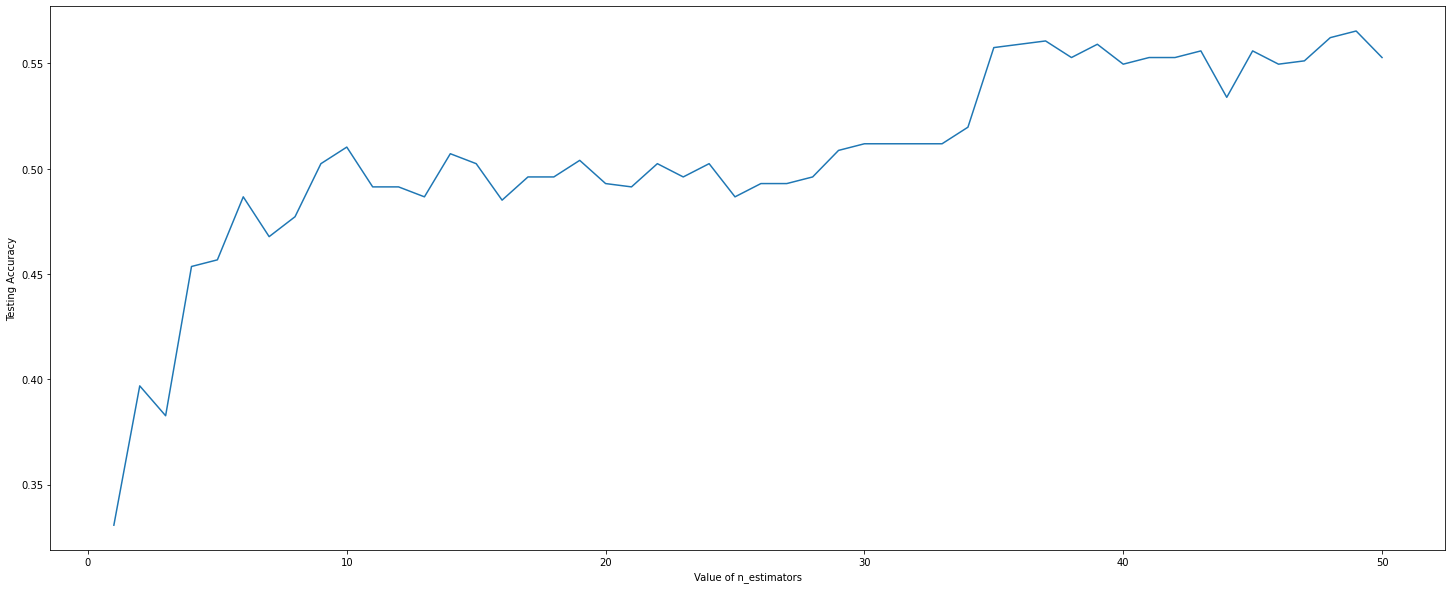

In [30]:
from sklearn.ensemble import AdaBoostClassifier
N=50
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = AdaBoostClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt
#plot the relationship between K and the testing accuracy
plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

In [31]:
from sklearn.ensemble import AdaBoostClassifier

ada_best_estimator = AdaBoostClassifier(n_estimators=best_estimator,random_state=0)
ada_best_estimator.fit(X_train, y_train)
y_pred = ada_best_estimator.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(ada_best_estimator,1,'AdaBoostClassifier')]=accuracy_score(y_test, y_pred)

[[ 86  34  25  18]
 [ 33  88  14  10]
 [ 29  23  84  32]
 [ 15  18  25 101]]
              precision    recall  f1-score   support

           0       0.53      0.53      0.53       163
           1       0.54      0.61      0.57       145
           2       0.57      0.50      0.53       168
           3       0.63      0.64      0.63       159

    accuracy                           0.57       635
   macro avg       0.57      0.57      0.57       635
weighted avg       0.57      0.57      0.56       635

Accurecy:  0.5653543307086614




---



---



#Graddient Boosting

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

gradBoost_default = GradientBoostingClassifier(random_state=0)
gradBoost_default.fit(X_train, y_train)
y_pred = gradBoost_default.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(gradBoost_default,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[108  23  23   9]
 [ 22 112   4   7]
 [ 26  10 109  23]
 [ 10   6  22 121]]
              precision    recall  f1-score   support

           0       0.65      0.66      0.66       163
           1       0.74      0.77      0.76       145
           2       0.69      0.65      0.67       168
           3       0.76      0.76      0.76       159

    accuracy                           0.71       635
   macro avg       0.71      0.71      0.71       635
weighted avg       0.71      0.71      0.71       635

Accurecy:  0.7086614173228346


1/50 round completed......................... Accurecy: 0.5228346456692914
2/50 round completed......................... Accurecy: 0.5354330708661418
3/50 round completed......................... Accurecy: 0.5606299212598426
4/50 round completed......................... Accurecy: 0.5590551181102362
5/50 round completed......................... Accurecy: 0.5779527559055118
6/50 round completed......................... Accurecy: 0.5858267716535434
7/50 round completed......................... Accurecy: 0.5858267716535434
8/50 round completed......................... Accurecy: 0.5952755905511811
9/50 round completed......................... Accurecy: 0.5968503937007874
10/50 round completed......................... Accurecy: 0.6047244094488189
11/50 round completed......................... Accurecy: 0.6094488188976378
12/50 round completed......................... Accurecy: 0.6157480314960629
13/50 round completed......................... Accurecy: 0.6204724409448819
14/50 round completed

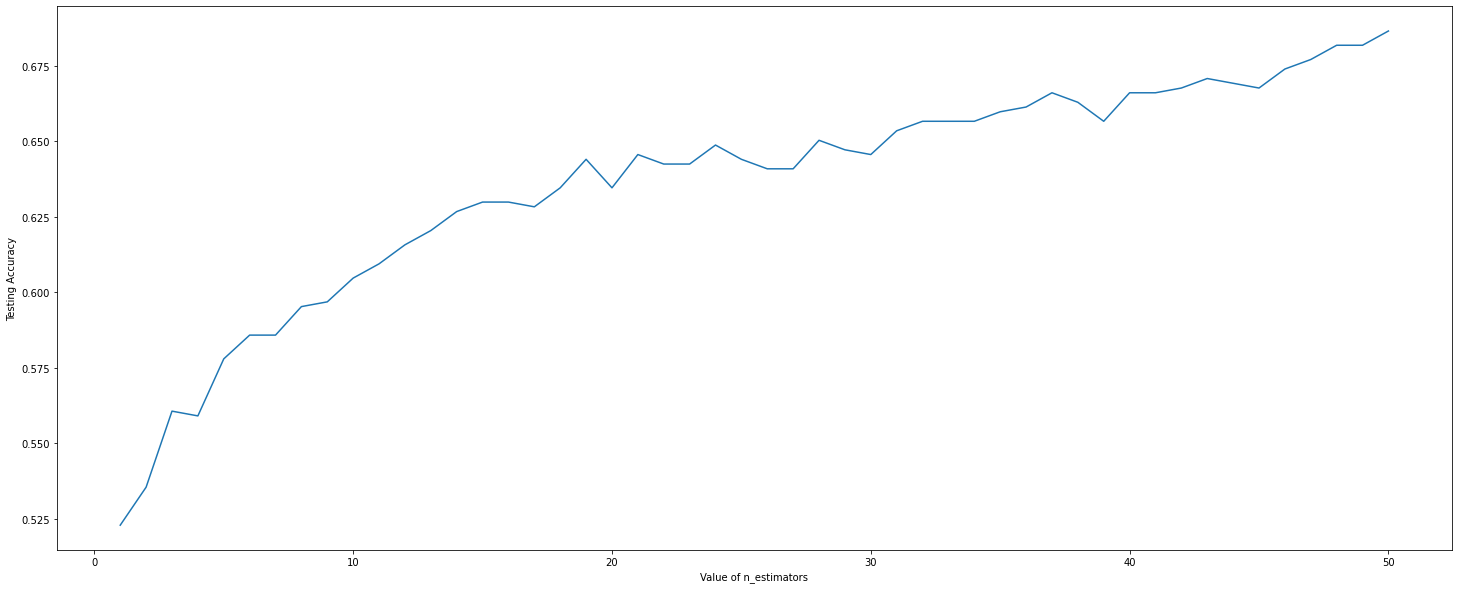

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=50
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = GradientBoostingClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/14 round completed......................... Accurecy: 0.573228346456693
2/14 round completed......................... Accurecy: 0.6740157480314961
3/14 round completed......................... Accurecy: 0.7086614173228346
4/14 round completed......................... Accurecy: 0.7637795275590551
5/14 round completed......................... Accurecy: 0.7732283464566929
6/14 round completed......................... Accurecy: 0.8094488188976378
7/14 round completed......................... Accurecy: 0.8047244094488188
8/14 round completed......................... Accurecy: 0.8251968503937008
9/14 round completed......................... Accurecy: 0.8078740157480315
10/14 round completed......................... Accurecy: 0.8110236220472441
11/14 round completed......................... Accurecy: 0.8125984251968504
12/14 round completed......................... Accurecy: 0.8078740157480315
13/14 round completed......................... Accurecy: 0.7874015748031497
14/14 round completed.

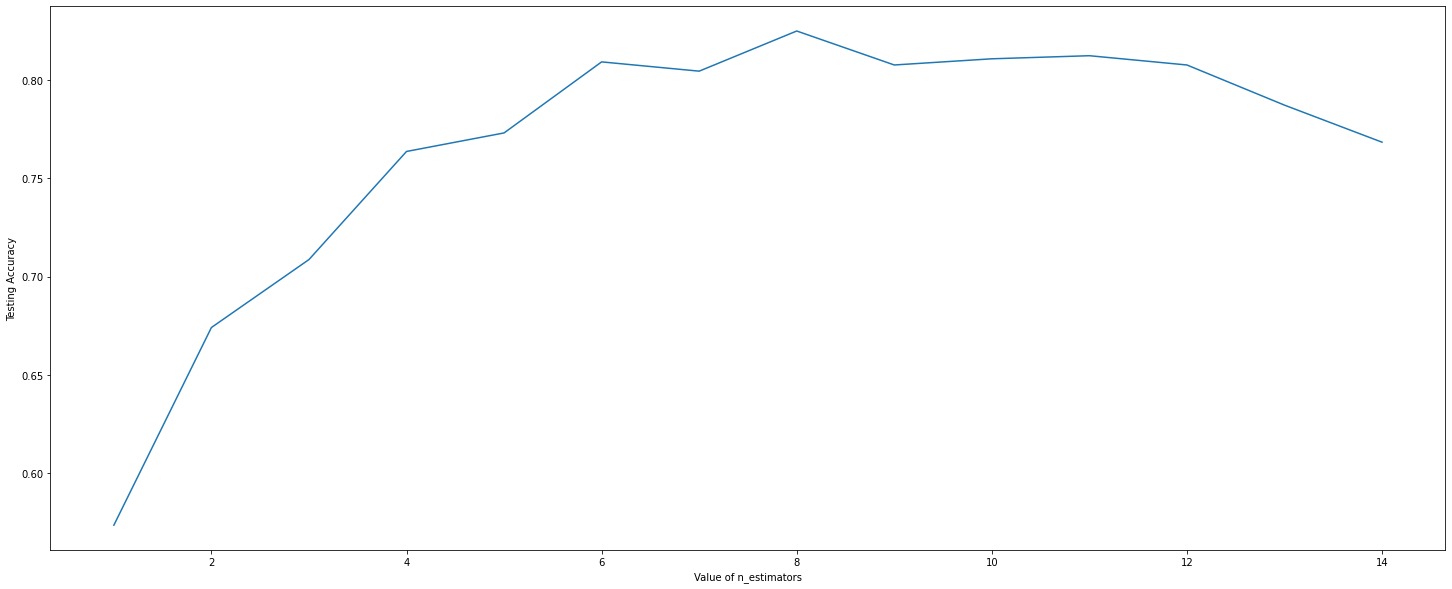

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=14
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = GradientBoostingClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [35]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_estimator = GradientBoostingClassifier(n_estimators=best_estimator,random_state=0)
gradBoost_estimator.fit(X_train, y_train)
y_pred = gradBoost_estimator.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(gradBoost_estimator,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[107  25  22   9]
 [ 17 115   6   7]
 [ 24  17 103  24]
 [ 12  11  25 111]]
              precision    recall  f1-score   support

           0       0.67      0.66      0.66       163
           1       0.68      0.79      0.73       145
           2       0.66      0.61      0.64       168
           3       0.74      0.70      0.72       159

    accuracy                           0.69       635
   macro avg       0.69      0.69      0.69       635
weighted avg       0.69      0.69      0.69       635

Accurecy:  0.6866141732283465


In [36]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_depth = GradientBoostingClassifier(max_depth=best_depth,random_state=0)
gradBoost_depth.fit(X_train, y_train)
y_pred = gradBoost_depth.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

result[(gradBoost_depth,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[120  14  22   7]
 [  8 131   4   2]
 [ 16  10 134   8]
 [  8   1  11 139]]
              precision    recall  f1-score   support

           0       0.79      0.74      0.76       163
           1       0.84      0.90      0.87       145
           2       0.78      0.80      0.79       168
           3       0.89      0.87      0.88       159

    accuracy                           0.83       635
   macro avg       0.83      0.83      0.83       635
weighted avg       0.82      0.83      0.82       635

Accurecy:  0.8251968503937008


In [37]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_all = GradientBoostingClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
gradBoost_all.fit(X_train, y_train)
y_pred = gradBoost_all.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

result[(gradBoost_all,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[119  17  22   5]
 [ 11 128   3   3]
 [ 15   9 130  14]
 [  8   1  12 138]]
              precision    recall  f1-score   support

           0       0.78      0.73      0.75       163
           1       0.83      0.88      0.85       145
           2       0.78      0.77      0.78       168
           3       0.86      0.87      0.87       159

    accuracy                           0.81       635
   macro avg       0.81      0.81      0.81       635
weighted avg       0.81      0.81      0.81       635

Accurecy:  0.8110236220472441




---



---



#Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf_default = RandomForestClassifier(random_state=0)
rf_default.fit(X_train, y_train)
y_pred=rf_default.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_default,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[118  16  23   6]
 [ 11 127   3   4]
 [ 17  11 134   6]
 [  6   2  12 139]]
              precision    recall  f1-score   support

           0       0.78      0.72      0.75       163
           1       0.81      0.88      0.84       145
           2       0.78      0.80      0.79       168
           3       0.90      0.87      0.89       159

    accuracy                           0.82       635
   macro avg       0.82      0.82      0.82       635
weighted avg       0.82      0.82      0.82       635

Accurecy:  0.815748031496063


1/150 round completed......................... Accurecy: 0.6062992125984252
2/150 round completed......................... Accurecy: 0.5905511811023622
3/150 round completed......................... Accurecy: 0.6566929133858268
4/150 round completed......................... Accurecy: 0.6755905511811023
5/150 round completed......................... Accurecy: 0.694488188976378
6/150 round completed......................... Accurecy: 0.6866141732283465
7/150 round completed......................... Accurecy: 0.7070866141732284
8/150 round completed......................... Accurecy: 0.721259842519685
9/150 round completed......................... Accurecy: 0.7307086614173228
10/150 round completed......................... Accurecy: 0.7338582677165354
11/150 round completed......................... Accurecy: 0.7338582677165354
12/150 round completed......................... Accurecy: 0.7417322834645669
13/150 round completed......................... Accurecy: 0.7464566929133858
14/150 rou

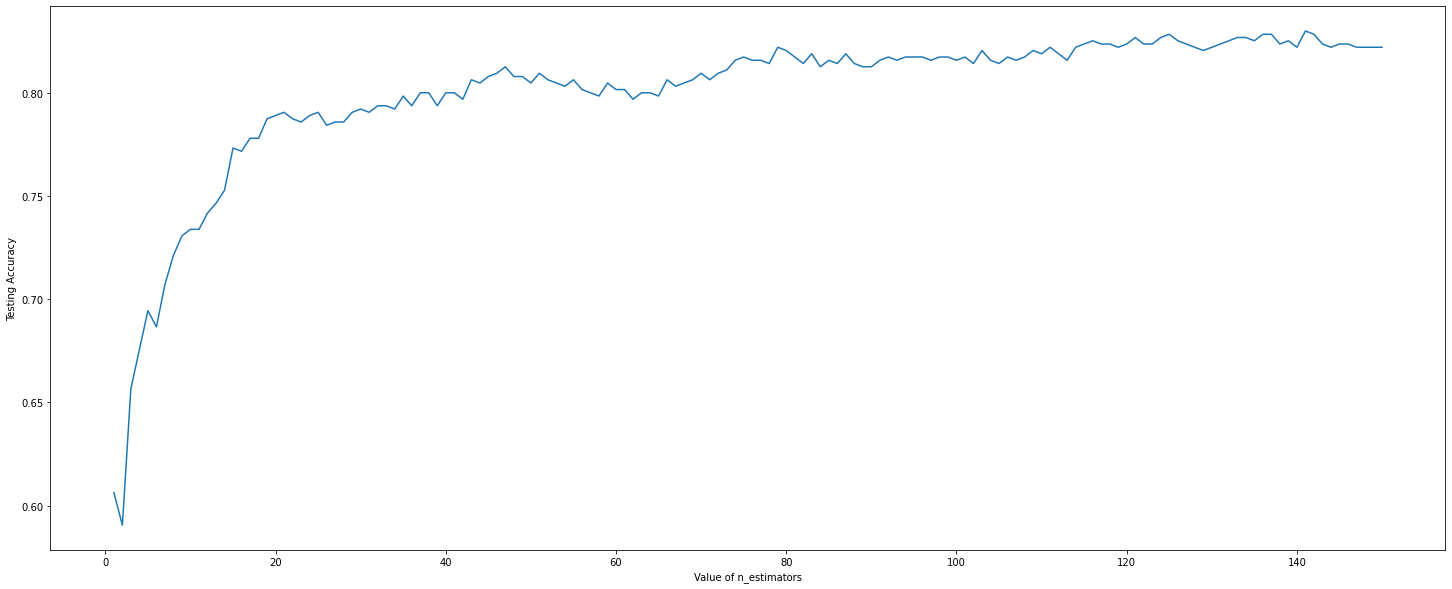

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=150
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = RandomForestClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/30 round completed......................... Accurecy: 0.3716535433070866
2/30 round completed......................... Accurecy: 0.5118110236220472
3/30 round completed......................... Accurecy: 0.5291338582677165
4/30 round completed......................... Accurecy: 0.5716535433070866
5/30 round completed......................... Accurecy: 0.5937007874015748
6/30 round completed......................... Accurecy: 0.6393700787401575
7/30 round completed......................... Accurecy: 0.6803149606299213
8/30 round completed......................... Accurecy: 0.7023622047244095
9/30 round completed......................... Accurecy: 0.7307086614173228
10/30 round completed......................... Accurecy: 0.7622047244094489
11/30 round completed......................... Accurecy: 0.7795275590551181
12/30 round completed......................... Accurecy: 0.7968503937007874
13/30 round completed......................... Accurecy: 0.8094488188976378
14/30 round completed

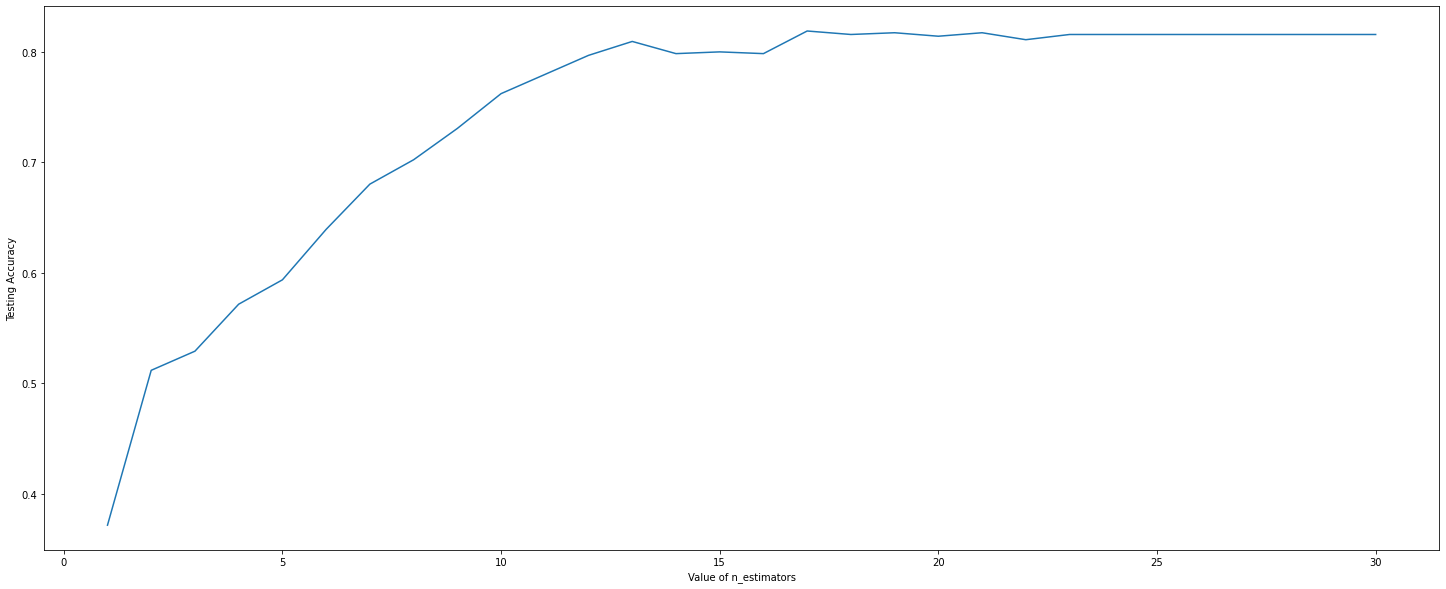

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=30
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = RandomForestClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf_estimator = RandomForestClassifier(n_estimators=best_estimator,random_state=0)
rf_estimator.fit(X_train, y_train)
y_pred=rf_estimator.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_estimator,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[122  15  22   4]
 [ 10 129   3   3]
 [ 18   9 136   5]
 [  6   2  11 140]]
              precision    recall  f1-score   support

           0       0.78      0.75      0.76       163
           1       0.83      0.89      0.86       145
           2       0.79      0.81      0.80       168
           3       0.92      0.88      0.90       159

    accuracy                           0.83       635
   macro avg       0.83      0.83      0.83       635
weighted avg       0.83      0.83      0.83       635

Accurecy:  0.8299212598425196


In [42]:
from sklearn.ensemble import RandomForestClassifier
rf_depth = RandomForestClassifier(max_depth=best_depth,random_state=0)
rf_depth.fit(X_train, y_train)
y_pred=rf_depth.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_depth,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[118  13  21  11]
 [ 11 129   2   3]
 [ 18   9 135   6]
 [  8   2  11 138]]
              precision    recall  f1-score   support

           0       0.76      0.72      0.74       163
           1       0.84      0.89      0.87       145
           2       0.80      0.80      0.80       168
           3       0.87      0.87      0.87       159

    accuracy                           0.82       635
   macro avg       0.82      0.82      0.82       635
weighted avg       0.82      0.82      0.82       635

Accurecy:  0.8188976377952756


In [43]:
from sklearn.ensemble import RandomForestClassifier
rf_all = RandomForestClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
rf_all.fit(X_train, y_train)
y_pred=rf_all.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_all,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[120  15  19   9]
 [ 10 129   3   3]
 [ 20   8 134   6]
 [ 10   2  10 137]]
              precision    recall  f1-score   support

           0       0.75      0.74      0.74       163
           1       0.84      0.89      0.86       145
           2       0.81      0.80      0.80       168
           3       0.88      0.86      0.87       159

    accuracy                           0.82       635
   macro avg       0.82      0.82      0.82       635
weighted avg       0.82      0.82      0.82       635

Accurecy:  0.8188976377952756




---



---



#XGB

In [44]:


import xgboost as xgb
xgb_deafult = xgb.XGBClassifier(random_state=0)
xgb_deafult.fit(X_train.values,y_train.values)
y_pred = xgb_deafult.predict(X_test.values)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_deafult,4,'xgboost')]=accuracy_score(y_test, y_pred)

[[117  17  22   7]
 [ 10 130   3   2]
 [ 24   9 129   6]
 [  4   2  13 140]]
              precision    recall  f1-score   support

           0       0.75      0.72      0.74       163
           1       0.82      0.90      0.86       145
           2       0.77      0.77      0.77       168
           3       0.90      0.88      0.89       159

    accuracy                           0.81       635
   macro avg       0.81      0.82      0.81       635
weighted avg       0.81      0.81      0.81       635

Accurecy:  0.8125984251968504


1/250 round completed......................... Accurecy: 0.6346456692913386
2/250 round completed......................... Accurecy: 0.6645669291338583
3/250 round completed......................... Accurecy: 0.6818897637795276
4/250 round completed......................... Accurecy: 0.6960629921259842
5/250 round completed......................... Accurecy: 0.7133858267716535
6/250 round completed......................... Accurecy: 0.710236220472441
7/250 round completed......................... Accurecy: 0.7149606299212599
8/250 round completed......................... Accurecy: 0.7181102362204724
9/250 round completed......................... Accurecy: 0.7181102362204724
10/250 round completed......................... Accurecy: 0.7196850393700788
11/250 round completed......................... Accurecy: 0.7307086614173228
12/250 round completed......................... Accurecy: 0.7291338582677165
13/250 round completed......................... Accurecy: 0.7370078740157481
14/250 ro

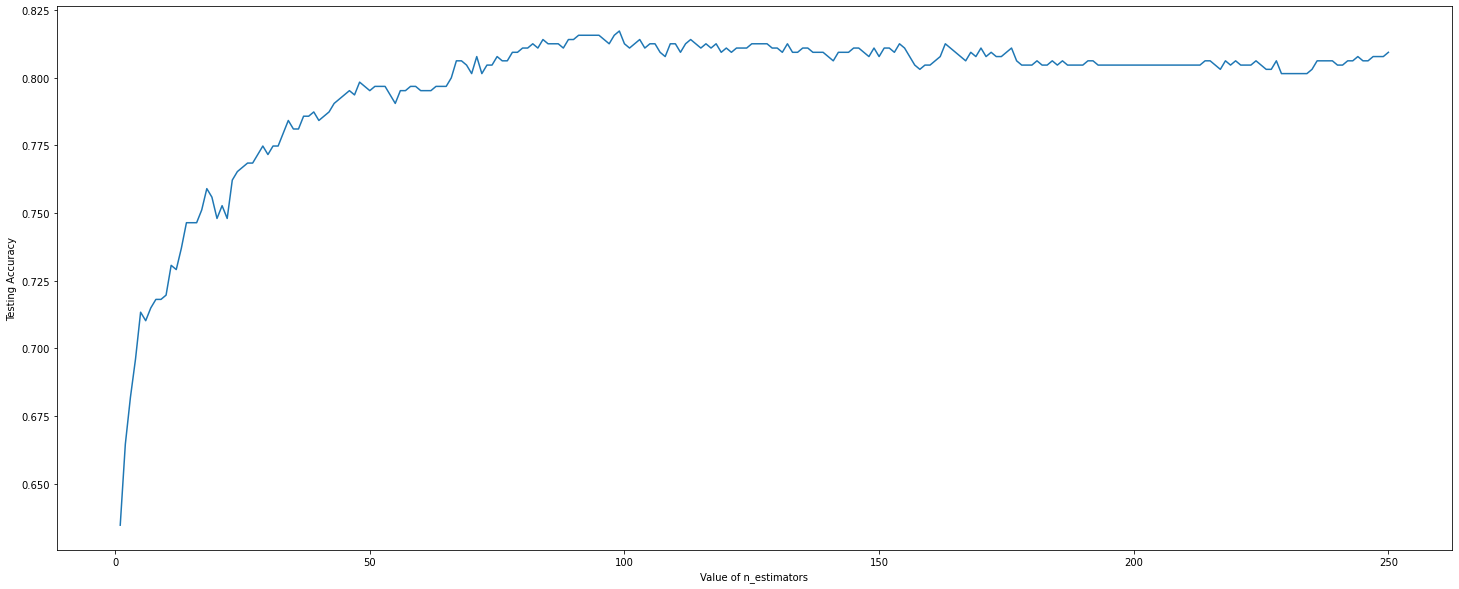

In [45]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
N=250
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  xgb_classifier = xgb.XGBClassifier(n_estimators=k,random_state=0)
  xgb_classifier.fit(X_train.values, y_train.values)
  y_pred=xgb_classifier.predict(X_test.values)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/30 round completed......................... Accurecy: 0.5858267716535434
2/30 round completed......................... Accurecy: 0.6897637795275591
3/30 round completed......................... Accurecy: 0.7433070866141732
4/30 round completed......................... Accurecy: 0.7937007874015748
5/30 round completed......................... Accurecy: 0.7968503937007874
6/30 round completed......................... Accurecy: 0.8125984251968504
7/30 round completed......................... Accurecy: 0.8125984251968504
8/30 round completed......................... Accurecy: 0.8125984251968504
9/30 round completed......................... Accurecy: 0.8204724409448819
10/30 round completed......................... Accurecy: 0.8110236220472441
11/30 round completed......................... Accurecy: 0.8141732283464567
12/30 round completed......................... Accurecy: 0.8110236220472441
13/30 round completed......................... Accurecy: 0.8110236220472441
14/30 round completed

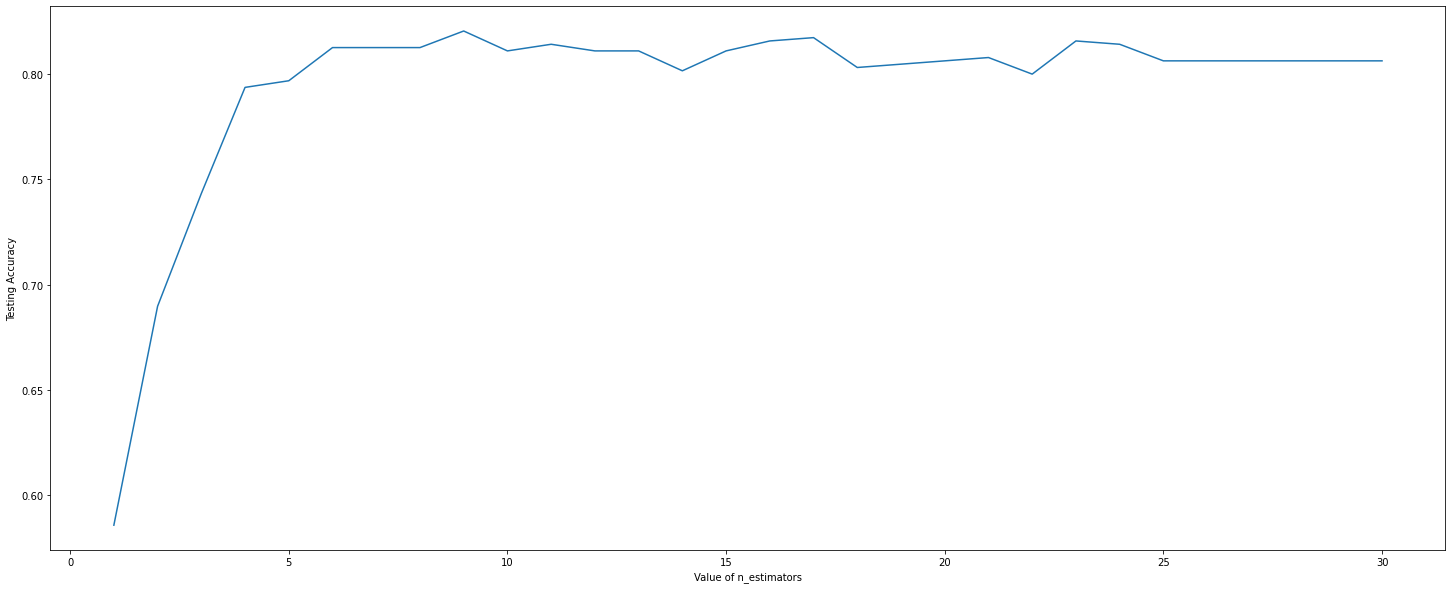

In [46]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
N=30
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  xgb_classifier = xgb.XGBClassifier(max_depth=k,random_state=0)
  xgb_classifier.fit(X_train.values, y_train.values)
  y_pred=xgb_classifier.predict(X_test.values)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [47]:
import xgboost as xgb
xgb_depth = xgb.XGBClassifier(max_depth=best_depth,random_state=0)
xgb_depth.fit(X_train.values,y_train.values)
y_pred = xgb_depth.predict(X_test.values)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_depth,4,'xgboost')]=accuracy_score(y_test, y_pred)
print(xgb_depth)

[[116  16  24   7]
 [  9 132   2   2]
 [ 21   8 132   7]
 [  5   2  11 141]]
              precision    recall  f1-score   support

           0       0.77      0.71      0.74       163
           1       0.84      0.91      0.87       145
           2       0.78      0.79      0.78       168
           3       0.90      0.89      0.89       159

    accuracy                           0.82       635
   macro avg       0.82      0.82      0.82       635
weighted avg       0.82      0.82      0.82       635

Accurecy:  0.8204724409448819
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None

In [48]:
import xgboost as xgb
xgb_estimator = xgb.XGBClassifier(n_estimators=best_estimator,random_state=0)
xgb_estimator.fit(X_train.values,y_train.values)
y_pred = xgb_estimator.predict(X_test.values)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_estimator,4,'xgboost')]=accuracy_score(y_test, y_pred)
print(xgb_estimator)

[[118  16  22   7]
 [ 10 130   3   2]
 [ 23   9 131   5]
 [  4   2  13 140]]
              precision    recall  f1-score   support

           0       0.76      0.72      0.74       163
           1       0.83      0.90      0.86       145
           2       0.78      0.78      0.78       168
           3       0.91      0.88      0.89       159

    accuracy                           0.82       635
   macro avg       0.82      0.82      0.82       635
weighted avg       0.82      0.82      0.82       635

Accurecy:  0.8173228346456692
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None

In [49]:
import xgboost as xgb
xgb_all = xgb.XGBClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
xgb_all.fit(X_train.values,y_train.values)
y_pred = xgb_all.predict(X_test.values)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_all,4,'xgboost')]=accuracy_score(y_test, y_pred)

[[116  16  24   7]
 [  9 132   2   2]
 [ 21   8 132   7]
 [  5   2  12 140]]
              precision    recall  f1-score   support

           0       0.77      0.71      0.74       163
           1       0.84      0.91      0.87       145
           2       0.78      0.79      0.78       168
           3       0.90      0.88      0.89       159

    accuracy                           0.82       635
   macro avg       0.82      0.82      0.82       635
weighted avg       0.82      0.82      0.82       635

Accurecy:  0.8188976377952756


#KNN

In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn_default = KNeighborsClassifier()
knn_default.fit(X_train, y_train)
y_pred=knn_default.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(knn_default,5,'KNeighborsClassifier')]=accuracy_score(y_test, y_pred)

[[ 77  36  21  29]
 [ 20 113   6   6]
 [ 24  18 111  15]
 [ 18   9  22 110]]
              precision    recall  f1-score   support

           0       0.55      0.47      0.51       163
           1       0.64      0.78      0.70       145
           2       0.69      0.66      0.68       168
           3       0.69      0.69      0.69       159

    accuracy                           0.65       635
   macro avg       0.64      0.65      0.65       635
weighted avg       0.64      0.65      0.64       635

Accurecy:  0.647244094488189


1/105 round completed......................... Accurecy: 0.7826771653543307
2/105 round completed......................... Accurecy: 0.7244094488188977
3/105 round completed......................... Accurecy: 0.6850393700787402
4/105 round completed......................... Accurecy: 0.6755905511811023
5/105 round completed......................... Accurecy: 0.647244094488189
6/105 round completed......................... Accurecy: 0.6220472440944882
7/105 round completed......................... Accurecy: 0.6236220472440945
8/105 round completed......................... Accurecy: 0.6110236220472441
9/105 round completed......................... Accurecy: 0.6125984251968504
10/105 round completed......................... Accurecy: 0.5952755905511811
11/105 round completed......................... Accurecy: 0.584251968503937
12/105 round completed......................... Accurecy: 0.5653543307086614
13/105 round completed......................... Accurecy: 0.5622047244094488
14/105 rou

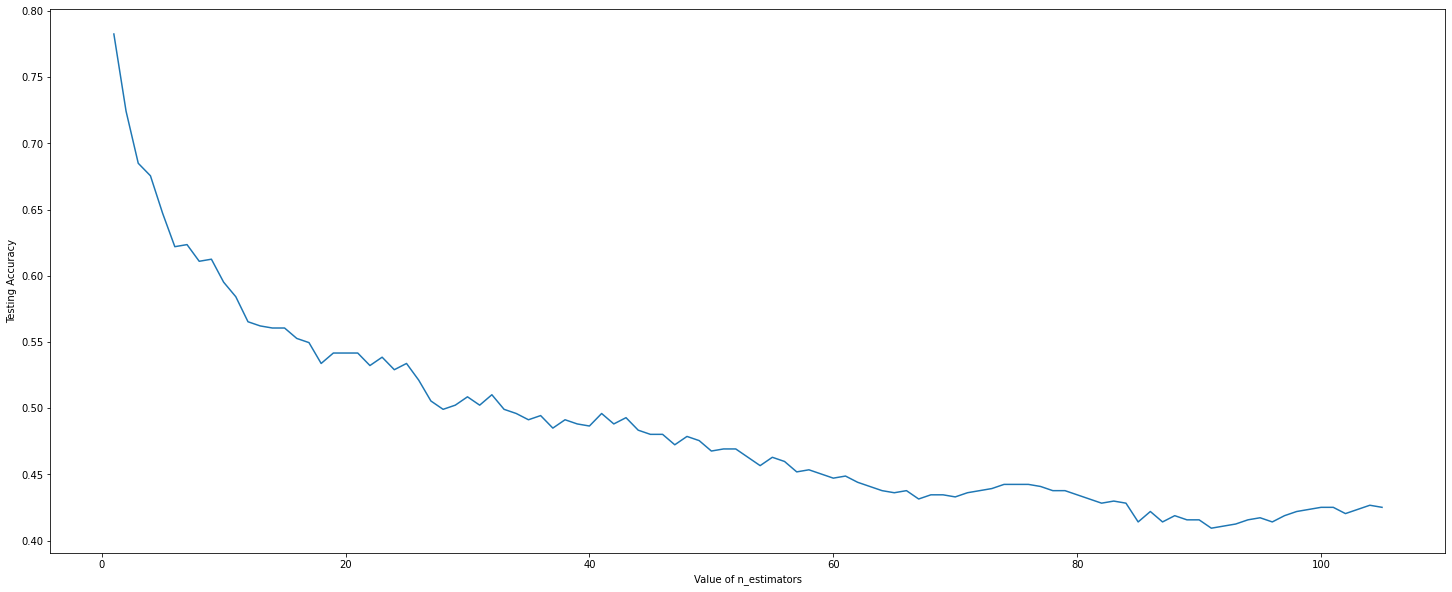

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
Neighbors=105
k_range = range (1,Neighbors+1)
scores={}
scores_list = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred=knn.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(Neighbors)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best=list(scores.keys())[scores_list.index(max(scores_list))]
print(best)

In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn_neighbors = KNeighborsClassifier(n_neighbors=best)
knn_neighbors.fit(X_train, y_train)
y_pred=knn_neighbors.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(knn_neighbors,5,'KNeighborsClassifier')]=accuracy_score(y_test, y_pred)

[[ 78  25  30  30]
 [  5 137   1   2]
 [ 10   6 143   9]
 [  5   6   9 139]]
              precision    recall  f1-score   support

           0       0.80      0.48      0.60       163
           1       0.79      0.94      0.86       145
           2       0.78      0.85      0.81       168
           3       0.77      0.87      0.82       159

    accuracy                           0.78       635
   macro avg       0.78      0.79      0.77       635
weighted avg       0.78      0.78      0.77       635

Accurecy:  0.7826771653543307


#NB

In [53]:
from sklearn.naive_bayes import GaussianNB

nb_deafult = GaussianNB()
nb_deafult.fit(X_train, y_train)
y_pred = nb_deafult.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(nb_deafult,6,'GaussianNB')]=accuracy_score(y_test, y_pred)

[[75 19 17 52]
 [47 47 19 32]
 [31 26 82 29]
 [11 30 48 70]]
              precision    recall  f1-score   support

           0       0.46      0.46      0.46       163
           1       0.39      0.32      0.35       145
           2       0.49      0.49      0.49       168
           3       0.38      0.44      0.41       159

    accuracy                           0.43       635
   macro avg       0.43      0.43      0.43       635
weighted avg       0.43      0.43      0.43       635

Accurecy:  0.431496062992126




---



---



#Result

In [54]:

models=[]

for i in result:
  models.append(i[0])
  print(i[0],i[1]," : ",result[i])
  print("---------------------------------------------------------------")
  print()


AdaBoostClassifier(random_state=0) 1  :  0.552755905511811
---------------------------------------------------------------

AdaBoostClassifier(n_estimators=49, random_state=0) 1  :  0.5653543307086614
---------------------------------------------------------------

GradientBoostingClassifier(random_state=0) 2  :  0.7086614173228346
---------------------------------------------------------------

GradientBoostingClassifier(n_estimators=50, random_state=0) 2  :  0.6866141732283465
---------------------------------------------------------------

GradientBoostingClassifier(max_depth=8, random_state=0) 2  :  0.8251968503937008
---------------------------------------------------------------

GradientBoostingClassifier(max_depth=8, n_estimators=50, random_state=0) 2  :  0.8110236220472441
---------------------------------------------------------------

RandomForestClassifier(random_state=0) 3  :  0.815748031496063
---------------------------------------------------------------

RandomForestCl

In [55]:
sorted_list=[]
sorted_list = sorted(result, key=result.get,reverse=True)

for i in sorted_list:
  print(i,"  : ",result[i])
  print("-------------------------------------------------------------------------------------------------")

print(sorted_list)


flage=[]
best_models=[]
it=0

for i in sorted_list:
  if it==4:
    break

  if i[1] not in flage:
    best_models.append((i[0],i[2]))
    flage.append(i[1])
    it+=1


(RandomForestClassifier(n_estimators=141, random_state=0), 3, 'RandomForestClassifier')   :  0.8299212598425196
-------------------------------------------------------------------------------------------------
(GradientBoostingClassifier(max_depth=8, random_state=0), 2, 'GradientBoostingClassifier')   :  0.8251968503937008
-------------------------------------------------------------------------------------------------
(XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_wei

In [56]:
print("best_models:")
for i in best_models:
  print(i)


best_models:
(RandomForestClassifier(n_estimators=141, random_state=0), 'RandomForestClassifier')
(GradientBoostingClassifier(max_depth=8, random_state=0), 'GradientBoostingClassifier')
(XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...), 'xgboost')
(KNeighborsClassifier(n_neighbors=1), 'KNei

In [57]:
len(best_models)

4

#Performance parameter for each class

In [58]:

def confusion_details(y_test,y_pred):
    labels = list(set(y_test))
    labels.sort()

    print("Total labels: %s -> %s" % (len(labels), labels))

    df = pd.DataFrame(
        data=confusion_matrix(y_test, y_pred, labels=labels),
        columns=labels,
        index=labels
    )

    print(df)

    print()
    print("----------------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------------")
    print()
    #
    # Local (metrics per class)
    #
    tps = {}
    fps = {}
    fns = {}
    tns = {}

    precision_local = {}
    recall_local = {}
    f1_local = {}
    accuracy_local = {}
    specificity_local={}

    for label in labels:
        tps[label] = df.loc[label, label]
        fps[label] = df[label].sum() - tps[label]
        fns[label] = df.loc[label].sum() - tps[label]
        tns[label]=len(y_test) - (tps[label] + fps[label] + fns[label])
        
        tp, fp, fn, tn = tps[label], fps[label], fns[label], tns[label]
        
        precision_local[label] = tp / (tp + fp) if (tp + fp) > 0. else 0.
        specificity_local[label] = tn / (tn + fp) if (tn + fp) > 0. else 0.
        recall_local[label] = tp / (tp + fn) if (tp + fp) > 0. else 0.
        p, r = precision_local[label], recall_local[label]
        
        f1_local[label] = 2. * p * r / (p + r) if (p + r) > 0. else 0.
        accuracy_local[label] = tp / (tp + fp + fn) if (tp + fp + fn) > 0. else 0.



    print("#-- Local measures --#")
    print("True Positives(TP):", tps)
    print("False Positives(FP):", fps)
    print("True Negatives(TN):", tns)
    print("False Negatives(FN):", fns)
    print("----------------------------")

    print("Precision:", precision_local)
    print("Recall/Sensitivity:", recall_local)
    print("Specificity:",specificity_local)
    print("F1-Score:", f1_local)
    print("Accuracy:", accuracy_local)


    print()
    print("----------------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------------")
    print()
    #
    # Global
    #
    micro_averages = {}
    macro_averages = {}

    correct_predictions = sum(tps.values())
    true_negative=sum(tns.values())

    den = sum(list(tps.values()) + list(fps.values()))
    micro_averages["Precision"] = 1. * correct_predictions / den if den > 0. else 0.

    den = sum(list(tps.values()) + list(fns.values()))
    micro_averages["Recall"] = 1. * correct_predictions / den if den > 0. else 0.

    den = sum(list(tns.values()) + list(fps.values()))
    micro_averages["Specificity"] = 1. * true_negative / den if den > 0. else 0.


    micro_avg_p, micro_avg_r = micro_averages["Precision"], micro_averages["Recall"]
    micro_averages["F1-score"] = 2. * micro_avg_p * micro_avg_r / (micro_avg_p + micro_avg_r) if (micro_avg_p + micro_avg_r) > 0. else 0.

    macro_averages["Precision"] = np.mean(list(precision_local.values()))
    macro_averages["Recall"] = np.mean(list(recall_local.values()))
    macro_averages["Specificity"]=np.mean(list(specificity_local.values()))


    macro_avg_p, macro_avg_r = macro_averages["Precision"], macro_averages["Recall"]
    macro_averages["F1-Score"] = 2. * macro_avg_p * macro_avg_r / (macro_avg_p + macro_avg_r) if (macro_avg_p + macro_avg_r) > 0. else 0.

    total_predictions = df.values.sum()
    accuracy_global = correct_predictions / total_predictions if total_predictions > 0. else 0.

    print("#-- Global measures --#")
    print("Micro-Averages:", micro_averages)
    print("Macro-Averages:", macro_averages)
    print("Correct predictions:", correct_predictions)
    print("Total predictions:", total_predictions)
    print("Accuracy:", accuracy_global)


    print()
    print("----------------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------------")
    print()



    accuracy_local_new = {}
    for label in labels:
        tp, fp, fn, tn = tps[label], fps[label], fns[label], tns[label]
        accuracy_local_new[label] = (tp + tn) / (tp + fp + fn + tn) if (tp + fp + fn + tn) > 0. else 0.

    total_true = sum(list(tps.values()) + list(tns.values()))
    total_predictions = sum(list(tps.values()) + list(tns.values()) + list(fps.values()) + list(fns.values()))
    accuracy_global_new = 1. * total_true / total_predictions if total_predictions > 0. else 0.

    print("Accuracy (per class), with TNs:", accuracy_local_new)
    print("Accuracy (per class), without TNs:", accuracy_local)
    print("Accuracy (global), with TNs:", accuracy_global_new)
    print("Accuracy (global), without TNs:", accuracy_global)

In [59]:
new_keys_10=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=49, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=50, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=8, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=8, n_estimators=50, random_state=0)', …

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=141, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=17, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=17, n_estimators=141, random_state=0)', in…

Checkbox(value=False, description="XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description="XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description="XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description="XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=1)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

In [60]:
for i in range(len(new_keys_10)):
  if new_keys_10[i].value ==True:
    print("\n")
    print("_________________________________________________",models[i],"_______________________________________________")

    if str(models[i])[:3] == "XGB":
      y_pred = models[i].predict(X_test.values)
      confusion_details(y_test,y_pred)
    
    else:
      y_pred = models[i].predict(X_test)
      confusion_details(y_test,y_pred)
    print('\n')
    print("-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
    print("-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
    print("-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
    print('\n')
    print('\n')



_________________________________________________ GradientBoostingClassifier(max_depth=8, random_state=0) _______________________________________________
Total labels: 4 -> [0, 1, 2, 3]
     0    1    2    3
0  120   14   22    7
1    8  131    4    2
2   16   10  134    8
3    8    1   11  139

----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------

#-- Local measures --#
True Positives(TP): {0: 120, 1: 131, 2: 134, 3: 139}
False Positives(FP): {0: 32, 1: 25, 2: 37, 3: 17}
True Negatives(TN): {0: 440, 1: 465, 2: 430, 3: 459}
False Negatives(FN): {0: 43, 1: 14, 2: 34, 3: 20}
----------------------------
Precision: {0: 0.7894736842105263, 1: 0.8397435897435898, 2: 0.783625730994152, 3: 0.8910256410256411}
Recall/Sensitivity: {0: 0.7361963190184049, 1: 0.903448275862069, 2: 0.7976190476190477, 3: 0.8742138364779874}
Specificity: {0: 0.9322033898305084, 1: 0.9489795

#Testing Accuracy For Best 4 Models

In [61]:

for i in best_models:
  print("--------------------------------------------------")
  print()
  if str(i[0])[:3] == "XGB":
    y_pred=i[0].predict(X_test.values)
  else:
    y_pred=i[0].predict(X_test)
  print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test,y_pred))
  print("Accurecy: ",accuracy_score(y_test, y_pred))

--------------------------------------------------

[[122  15  22   4]
 [ 10 129   3   3]
 [ 18   9 136   5]
 [  6   2  11 140]]
              precision    recall  f1-score   support

           0       0.78      0.75      0.76       163
           1       0.83      0.89      0.86       145
           2       0.79      0.81      0.80       168
           3       0.92      0.88      0.90       159

    accuracy                           0.83       635
   macro avg       0.83      0.83      0.83       635
weighted avg       0.83      0.83      0.83       635

Accurecy:  0.8299212598425196
--------------------------------------------------

[[120  14  22   7]
 [  8 131   4   2]
 [ 16  10 134   8]
 [  8   1  11 139]]
              precision    recall  f1-score   support

           0       0.79      0.74      0.76       163
           1       0.84      0.90      0.87       145
           2       0.78      0.80      0.79       168
           3       0.89      0.87      0.88       159

    a

#SHAP

In [62]:
!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 27.9 MB/s eta 0:00:00


In [63]:

def SHAP_EXP(model,graph_feat):
  print("Models: ",model)

  explainer = shap.Explainer(model.predict, X_test)

  shap_values1 = explainer(X_test)
  features_names=list_of_feat

  if 'Subjects' in features_names:
    features_names.pop(0)


  shap.plots.bar(shap_values1,max_display=graph_feat["max_display"])

  print("---------------------")

  shap.summary_plot(shap_values1,max_display=graph_feat["max_display"],feature_names=features_names)

  print("---------------------")

  print("Local Explaination")
  shap.plots.waterfall(shap_values1[graph_feat["shap_values Index"]],max_display=graph_feat["max_display"])


  print("---------------------")

  shap.plots.bar(shap_values1[graph_feat["shap_values Index"]],max_display=graph_feat["max_display"])

In [64]:
new_keys_7=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=49, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=50, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=8, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=8, n_estimators=50, random_state=0)', …

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=141, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=17, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=17, n_estimators=141, random_state=0)', in…

Checkbox(value=False, description="XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description="XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description="XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description="XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=1)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

In [65]:
graph_feat={
    "max_display":20,
    "shap_values Index":2
}

for i in range(len(new_keys_7)):
  if new_keys_7[i].value ==True:
    SHAP_EXP(models[i],graph_feat)
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")

#Confusion Matrix For Testing

In [66]:
def Conf_Mat(X_,y_,attb,keys):

  import matplotlib.pyplot as plt
  from yellowbrick.classifier import ConfusionMatrix
  import matplotlib.dates as dates

  fig = plt.figure(figsize=(attb["Fig Height"],attb["Fig weidth"]))
  ax = fig.add_subplot(111)


  for i in range(len(keys)):
    if keys[i].value ==True:
      cm = ConfusionMatrix(models[i], classes=['Reading', 'Resting', 'Walking', 'Working'],fontsize=attb["Confusion Matrix Inner Fontsize"],ax=ax)

      if str(models[i])[:3] == "XGB":
        cm.fit(X_train.values, y_train.values)
        cm.score(X_.values, y_.values)
      else:
        cm.fit(X_train, y_train)
        cm.score(X_, y_)
      
      cm.ax.set_xlabel("Predicted Class", fontsize=attb["X Axis Fontsize"],fontweight="bold")
      cm.ax.set_ylabel("True Class", fontsize=attb["Y Axis Fontsize"],fontweight="bold")
      cm.ax.xaxis.set_tick_params(labelsize=attb["X Label Fontsize"])
      cm.ax.yaxis.set_tick_params(labelsize=attb["Y Label Fontsize"])
      for label in ax.get_xticklabels():
        label.set_fontweight(550)
      for label in ax.get_yticklabels():
        label.set_fontweight(550)
      
      plt.savefig(attb["type"]+"_Confusion_mat("+str(models[i])+").png")
      cm.show()
      print("--------------------")
      print("--------------------")

In [67]:
new_keys_6=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=49, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=50, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=8, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=8, n_estimators=50, random_state=0)', …

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=141, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=17, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=17, n_estimators=141, random_state=0)', in…

Checkbox(value=False, description="XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description="XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description="XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description="XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=1)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names


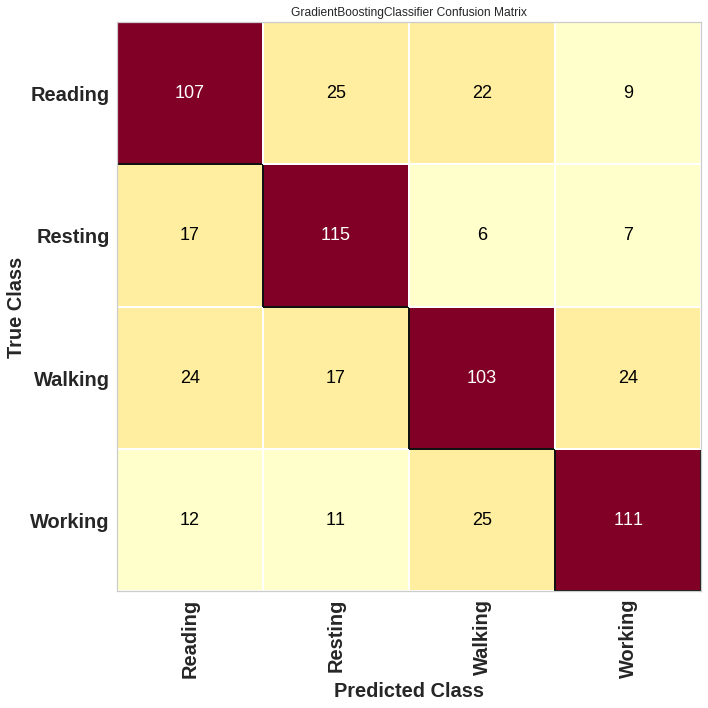

--------------------
--------------------


X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names


<Figure size 576x396 with 0 Axes>

--------------------
--------------------


X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names


<Figure size 576x396 with 0 Axes>

--------------------
--------------------


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


<Figure size 576x396 with 0 Axes>

--------------------
--------------------


In [68]:
attributes={
   "Fig Height": 10,
   "Fig weidth": 10, 
    
  "Y Axis Fontsize" : 20,
  "X Axis Fontsize" : 20,

  "Y Label Fontsize" : 20,
  "X Label Fontsize" : 20,

  "Confusion Matrix Inner Fontsize": 18,
  "type"  : "Testing"

}

Conf_Mat(X_test,y_test,attributes,new_keys_6)

#Confusion Matrix for Testing ( with Percent)

In [69]:
def Conf_Mat_percent(X_,y_,attb,keys):

  import matplotlib.pyplot as plt
  from yellowbrick.classifier import ConfusionMatrix
  import matplotlib.dates as dates

  fig = plt.figure(figsize=(attb["Fig Height"],attb["Fig weidth"]))
  ax = fig.add_subplot(111)


  for i in range(len(keys)):
    if keys[i].value ==True:
      cm = ConfusionMatrix(models[i], classes=['Reading', 'Resting', 'Walking', 'Working'],fontsize=attb["Confusion Matrix Inner Fontsize"],ax=ax,percent=True)

      if str(models[i])[:3] == "XGB":
        cm.fit(X_train.values, y_train.values)
        cm.score(X_.values, y_.values)
      else:
        cm.fit(X_train, y_train)
        cm.score(X_, y_)
      
      cm.ax.set_xlabel("Predicted Class", fontsize=attb["X Axis Fontsize"],fontweight="bold")
      cm.ax.set_ylabel("True Class", fontsize=attb["Y Axis Fontsize"],fontweight="bold")
      cm.ax.xaxis.set_tick_params(labelsize=attb["X Label Fontsize"])
      cm.ax.yaxis.set_tick_params(labelsize=attb["Y Label Fontsize"])
      for label in ax.get_xticklabels():
        label.set_fontweight(550)
      for label in ax.get_yticklabels():
        label.set_fontweight(550)
      
      plt.savefig(attb["type"]+"_Confusion_mat("+str(models[i])+").png")
      cm.show()
      print("--------------------")
      print("--------------------")

In [70]:
new_keys_20=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=49, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=50, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=8, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=8, n_estimators=50, random_state=0)', …

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=141, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=17, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=17, n_estimators=141, random_state=0)', in…

Checkbox(value=False, description="XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description="XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description="XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description="XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=1)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names


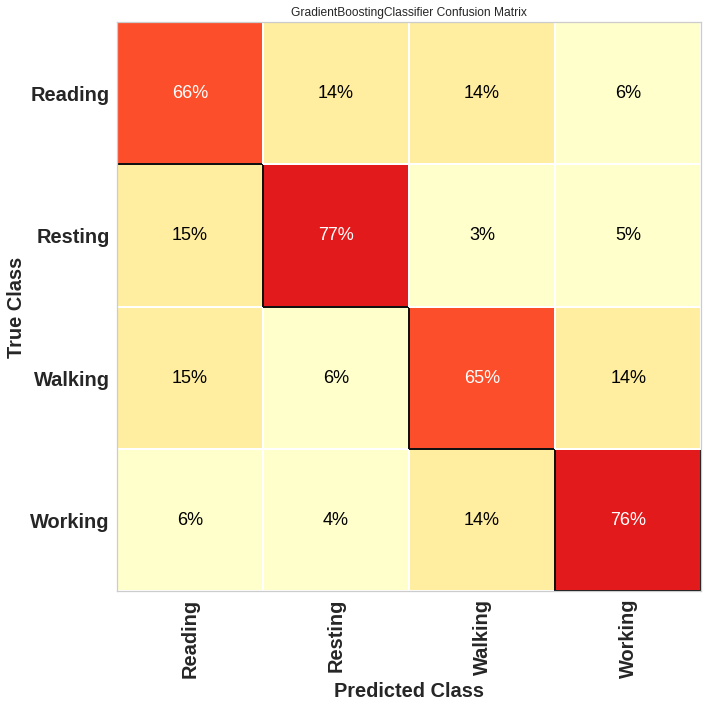

--------------------
--------------------


X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names


<Figure size 576x396 with 0 Axes>

--------------------
--------------------


X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names


<Figure size 576x396 with 0 Axes>

--------------------
--------------------


In [71]:
attributes={
   "Fig Height": 10,
   "Fig weidth": 10, 
    
  "Y Axis Fontsize" : 20,
  "X Axis Fontsize" : 20,

  "Y Label Fontsize" : 20,
  "X Label Fontsize" : 20,

  "Confusion Matrix Inner Fontsize": 18,
  "type"  : "Training"

}

Conf_Mat_percent(X_test,y_test,attributes,new_keys_20)

#Confusion Matrix For Training

In [72]:
new_keys_5=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=49, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=50, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=8, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=8, n_estimators=50, random_state=0)', …

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=141, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=17, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=17, n_estimators=141, random_state=0)', in…

Checkbox(value=False, description="XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description="XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description="XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description="XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=1)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names


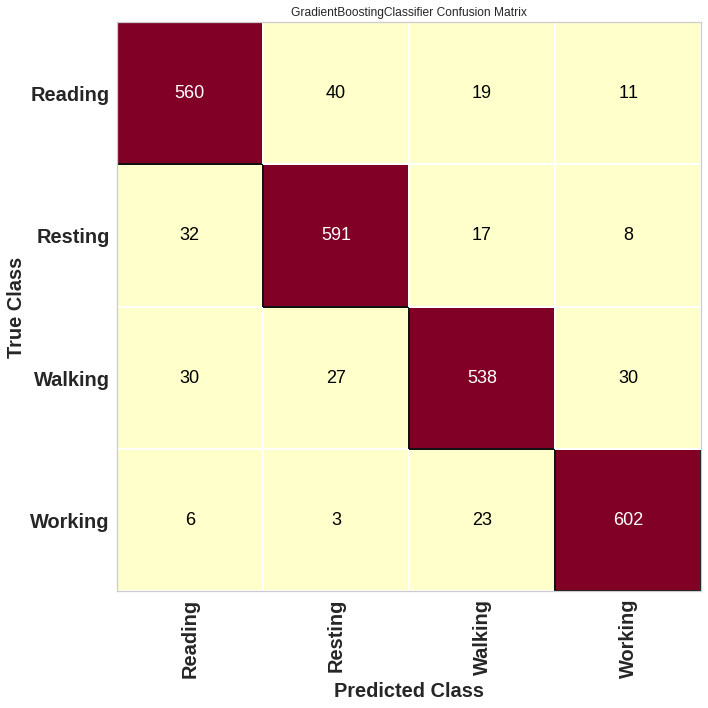

--------------------
--------------------


X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names


<Figure size 576x396 with 0 Axes>

--------------------
--------------------


X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names


<Figure size 576x396 with 0 Axes>

--------------------
--------------------


In [73]:
attributes={
   "Fig Height": 10,
   "Fig weidth": 10, 
    
  "Y Axis Fontsize" : 20,
  "X Axis Fontsize" : 20,

  "Y Label Fontsize" : 20,
  "X Label Fontsize" : 20,

  "Confusion Matrix Inner Fontsize": 18,
  "type"  : "Training"

}

Conf_Mat(X_train,y_train,attributes,new_keys_5)

#Confusion Matrix for Training ( with Percent)

In [ ]:
new_keys_21=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=42, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=45, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=9, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=9, n_estimators=45, random_state=0)', …

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=106, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=18, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=18, n_estimators=106, random_state=0)', in…

Checkbox(value=False, description="XGBClassifier(objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(max_depth=11, objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(n_estimators=244, objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(max_depth=11, n_estimators=244, objective='multi:softprob')",…

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=1)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names



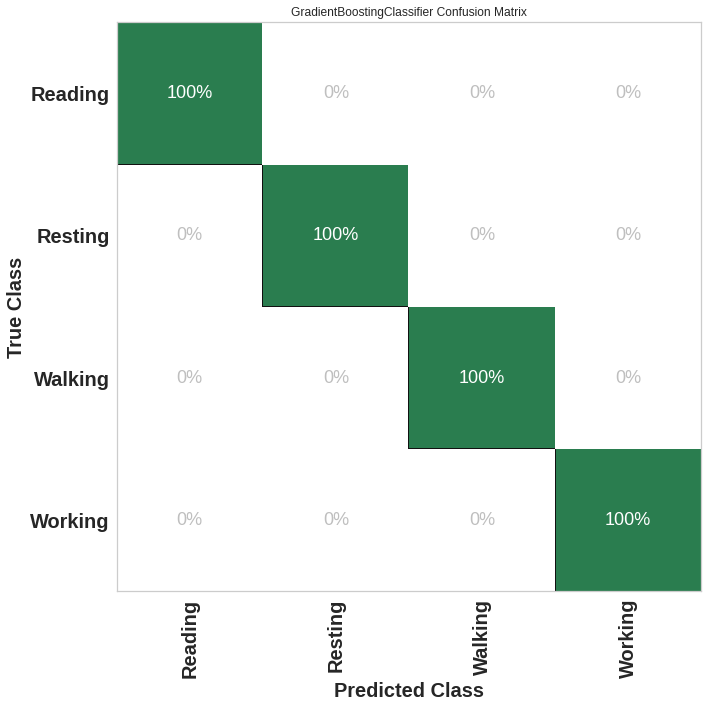

--------------------
--------------------


In [ ]:
attributes={
   "Fig Height": 10,
   "Fig weidth": 10, 
    
  "Y Axis Fontsize" : 20,
  "X Axis Fontsize" : 20,

  "Y Label Fontsize" : 20,
  "X Label Fontsize" : 20,

  "Confusion Matrix Inner Fontsize": 18,
  "type"  : "Training"

}

Conf_Mat_percent(X_train,y_train,attributes,new_keys_21)

#ROC FOR MULTICLASS

In [ ]:
!pip install plotly==5.11.0
!pip install -U kaleido


import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt

def ploty_ROC(model,X,y,fig_name,graph_attributes):
    
    lebel_dict={
    0: 'Reading',
    1: 'Resting',
    2: 'Walking',
    3: 'Working'
    }
    if str(model)[:3] == "XGB":
      y_scores = model.predict_proba(X.values)
    else:
      y_scores = model.predict_proba(X)
    #y_scores = model.predict_proba(X)

    y_onehot = pd.get_dummies(y, columns=model.classes_)

    fig = go.Figure()
    fig.add_shape(
        type='line', line=dict(dash='dash', width=5),        
        x0=0, x1=1, y0=0, y1=1
    )

    for i in range(y_scores.shape[1]):
        y_true = y_onehot.iloc[:, i]
        y_score = y_scores[:, i]

        fpr, tpr, _ = roc_curve(y_true, y_score)
        auc_score = roc_auc_score(y_true, y_score)
        name = f"{lebel_dict[y_onehot.columns[i]]} (AUC={auc_score:.2f})"
        fig.add_trace(go.Scatter(x=fpr, y=tpr, name=name, mode='lines'))

    fig.update_layout(
        xaxis_title='False Positive Rate',
        yaxis_title='True Positive Rate',
        yaxis=dict(scaleanchor="x", scaleratio=1),
        xaxis=dict(constrain='domain'),
        width=1000, height=1000,
        font=dict(
            family="Arial Black, monospace",
            size=graph_attributes["Font Size"],
            color=graph_attributes["Font Color"]
        ),
        legend=dict(
            x=0.62,
            y=0.05,
            traceorder="reversed",
            title_font_family="Arial Black",
            font=dict(
                family="Arial Black, monospace",
                size=graph_attributes["Legend Font Size"],
                color=graph_attributes["Legend Font Color"]
            ),
            bgcolor=graph_attributes["Legend bgcolor"],
            bordercolor=graph_attributes["Legend bordercolor"],
            borderwidth=graph_attributes["Legend borderwidth"]
        ),
        #plot_bgcolor="",
    )
    fig.update_xaxes(showline=True, linewidth=2, linecolor='black', tickfont_family="Arial Black")
    fig.update_yaxes(showline=True, linewidth=2, linecolor='black',tickfont_family="Arial Black")

    fig.show()
    fig.write_image(fig_name+".png")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 62.3 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.2 MB/s eta 0:00:00


In [ ]:
new_keys_9=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=42, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=45, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=9, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=9, n_estimators=45, random_state=0)', …

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=106, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=18, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=18, n_estimators=106, random_state=0)', in…

Checkbox(value=False, description="XGBClassifier(objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(max_depth=11, objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(n_estimators=244, objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(max_depth=11, n_estimators=244, objective='multi:softprob')",…

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=1)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

In [ ]:

#Change the attriutes for graph
graph_attributes={
    "Font Size"  : 25,
    "Font Color" : "black",
    "Legend Font Size"  : 25,
    "Legend Font Color" : "black",
    "Legend bgcolor"    : "LightSteelBlue",
    "Legend bordercolor": "White",
    "Legend borderwidth": 1

}



for i in range(len(new_keys_9)):
  if new_keys_9[i].value ==True:
    print(models[i])
    fig1=ploty_ROC(models[i],X_train,y_train,str(models[i]),graph_attributes)
    fig2=ploty_ROC(models[i],X_test,y_test,str(models[i]),graph_attributes)
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")

GradientBoostingClassifier(max_depth=9, random_state=0)


---------------------------------------------------------
---------------------------------------------------------
---------------------------------------------------------
---------------------------------------------------------


#Cross_val_score function

In [ ]:
from sklearn.model_selection import cross_val_score

k=5
for i in result:
  print(i[0]," -> Accuracy: ",result[i])
  l=list(cross_val_score(i[0],X_new, y_new,cv=k))
  avg=sum(l)/k
  print(i[0]," -> AVG Accurecy After CV: "+str(avg)+ " (For "+str(k)+" Fold)")
  print("--------------------------------------------------------------------------")

AdaBoostClassifier(random_state=0)  -> Accuracy:  0.5055118110236221
AdaBoostClassifier(random_state=0)  -> AVG Accurecy After CV: 0.5227248565538141 (For 5 Fold)
--------------------------------------------------------------------------
AdaBoostClassifier(n_estimators=42, random_state=0)  -> Accuracy:  0.5417322834645669
AdaBoostClassifier(n_estimators=42, random_state=0)  -> AVG Accurecy After CV: 0.5116813631734519 (For 5 Fold)
--------------------------------------------------------------------------
GradientBoostingClassifier(random_state=0)  -> Accuracy:  0.7086614173228346
GradientBoostingClassifier(random_state=0)  -> AVG Accurecy After CV: 0.69549169129884 (For 5 Fold)
--------------------------------------------------------------------------
GradientBoostingClassifier(n_estimators=45, random_state=0)  -> Accuracy:  0.6771653543307087
GradientBoostingClassifier(n_estimators=45, random_state=0)  -> AVG Accurecy After CV: 0.6563943466057278 (For 5 Fold)
-------------------------

# **LIME**

In [ ]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 KB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=5c18eb9218515ab3254062f7f316300bdde3889e57b99b64dc6e3428be2c1857
  Stored in directory: /root/.cache/pip/wheels/e6/a6/20/cc1e293fcdb67ede666fed293cb895395e7ecceb4467779546
Successfully built lime


In [ ]:

  def LIME_EXP(model,row):
    import lime
    from lime import lime_tabular


    if str(model)[:3] == "XGB":

      """explainer = lime.lime_tabular.LimeTabularExplainer(
        X_train.values,
        feature_names=list(list(X_new.columns)),                                         
        class_names=['Reading', 'Resting', 'Walking', 'Working']
        )
      
      exp = explainer.explain_instance(X_test.iloc[row, :].values,
                                 model.predict_proba,
                                 num_features=6,
                                 top_labels=2)"""
      print("Plz RUN XGboost cell....")
      return None



    else:
      explainer = lime_tabular.LimeTabularExplainer(
        training_data=np.array(X_train),
        feature_names=list(X_new.columns),
        class_names=['Reading', 'Resting', 'Walking', 'Working'],
        mode='classification'
        )

      exp = explainer.explain_instance(X_test.iloc[row],
                                      model.predict_proba,               
                                      num_features=6,
                                      top_labels=4)
    


    exp.show_in_notebook(show_table=True, show_all=True)



    import matplotlib.pyplot as plt
    with plt.style.context("ggplot"):
        exp.as_pyplot_figure()


    from IPython.display import HTML
    html_data = exp.as_html()
    HTML(data=html_data)

    exp.save_to_file(str(model)+".html")

In [ ]:
row = int(input("Enter the index of row to explain: "))      # the index of row to be explained in LIME


new_keys_8=models_check_box(models)

Enter the index of row to explain: 30


Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=42, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=45, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=9, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=9, n_estimators=45, random_state=0)', …

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=106, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=18, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=18, n_estimators=106, random_state=0)', in…

Checkbox(value=False, description="XGBClassifier(objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(max_depth=11, objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(n_estimators=244, objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(max_depth=11, n_estimators=244, objective='multi:softprob')",…

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=1)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

In [ ]:
for i in range(len(new_keys_8)):
  if new_keys_8[i].value ==True:
    print(models[i])
    LIME_EXP(models[i],row)
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")

### LIME for XGboost

In [ ]:
row = 18  ## the index of row to be explained in LIME

import lime
from lime import lime_tabular
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values,
                                                   feature_names=list(list(X_new.columns)),
                                                   class_names=['Reading', 'Resting', 'Walking', 'Working'])

####Default

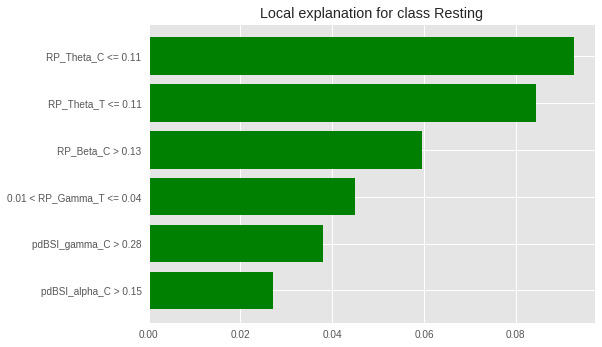

In [ ]:

exp = explainer.explain_instance(X_test.iloc[row, :].values,
                                 xgb_deafult.predict_proba,
                                 num_features=6,
                                 top_labels=4)

exp.show_in_notebook(show_table=True, show_all=False)

import matplotlib.pyplot as plt
with plt.style.context("ggplot"):
    exp.as_pyplot_figure()


from IPython.display import HTML
html_data = exp.as_html()
HTML(data=html_data)

exp.save_to_file(str(xgb_deafult)+".html")

####Best Max Depth

In [ ]:

exp = explainer.explain_instance(X_test.iloc[row, :].values,
                                 xgb_depth.predict_proba,
                                 num_features=6,
                                 top_labels=4)

exp.show_in_notebook(show_table=True, show_all=False)

import matplotlib.pyplot as plt
with plt.style.context("ggplot"):
    exp.as_pyplot_figure()


from IPython.display import HTML
html_data = exp.as_html()
HTML(data=html_data)

exp.save_to_file(str(xgb_depth)+".html")

####Best N Estimator

In [ ]:


exp = explainer.explain_instance(X_test.iloc[row, :].values,
                                 xgb_estimator.predict_proba,
                                 num_features=6,
                                 top_labels=4)

exp.show_in_notebook(show_table=True, show_all=False)

import matplotlib.pyplot as plt
with plt.style.context("ggplot"):
    exp.as_pyplot_figure()


from IPython.display import HTML
html_data = exp.as_html()
HTML(data=html_data)

exp.save_to_file(str(xgb_estimator)+".html")

####Best Depth and Best Estimator

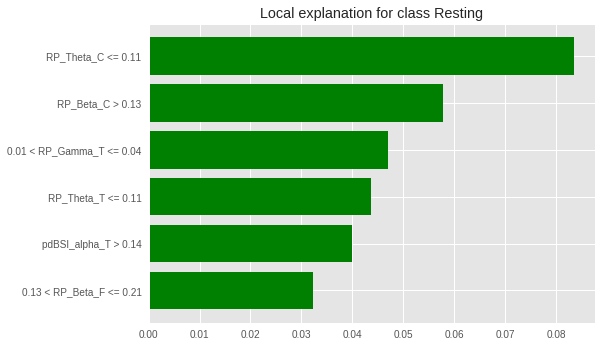

In [ ]:

exp = explainer.explain_instance(X_test.iloc[row, :].values,
                                 xgb_all.predict_proba,
                                 num_features=6,
                                 top_labels=4)

exp.show_in_notebook(show_table=True, show_all=False)


import matplotlib.pyplot as plt
with plt.style.context("ggplot"):
    exp.as_pyplot_figure()


from IPython.display import HTML
html_data = exp.as_html()
HTML(data=html_data)

exp.save_to_file(str(xgb_all)+".html")